In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
import tensorflow
%matplotlib inline

In [2]:
pip install opencv-contrib-python


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
train_dir = './Emergency_Vehicles/train/'
test_dir = './Emergency_Vehicles/test/'

Reading the first Image

In [4]:
image = cv2.imread('./Emergency_Vehicles/train/1.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB 

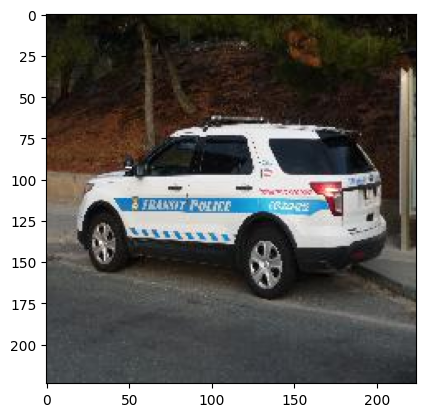

In [5]:
plt.imshow(image)

In [6]:
# sns.countplot(x='emergency_or_not' , data=train_df)

In [7]:
image.shape

(224, 224, 3)

Preprocessing

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Here we are applying our desired transformations  
image_gen = ImageDataGenerator(  
    rotation_range=20,# specifies the rotation to be 20% 
    width_shift_range=0.1, # specifies the width shift of 10% 
    height_shift_range=0.1,# specifies the height shift of 10% 
    shear_range=0.20, # crops part of the image  
    zoom_range=0.20, # #zooms the image by 20% 
    fill_mode='nearest', # fills using the nearest pixel  
    horizontal_flip=True, # Secifies the horizontal flip  
    rescale=1/255 # scales the image
)

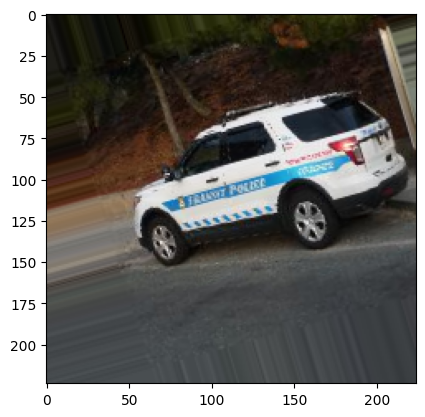

In [11]:
# showing the transformation 
plt.imshow(image_gen.random_transform(image)) 

In [12]:
train_df = pd.read_csv('./Emergency_Vehicles/train.csv')
test_df = pd.read_csv('./Emergency_Vehicles/test.csv')

In [13]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [14]:
train_df['emergency_or_not']=train_df['emergency_or_not'].astype(str) 

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [16]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col='emergency_or_not', # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50# defines the batch size  
                                             ) 
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col='emergency_or_not', # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50 # defines the batch size 
                                                  )

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


Constructor Stage

In [17]:
from keras.models import Sequential 
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization 

In [18]:
model = Sequential() 
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same')) 
#model.add(MaxPooling2D(pool_size=(2,2))) 
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu', padding = 'valid'))
#model.add(MaxPooling2D(pool_size=(2,2))) 
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu')) 
#model.add(MaxPooling2D(pool_size=(2,2))) 
#model.add(BatchNormalization()) 
 
model.add(Flatten()) 
 
model.add(Dense(50,activation = 'relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1,activation = 'sigmoid')) 

Compilation Stage

In [19]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 flatten (Flatten)           (None, 1605632)           0         
                                                                 
 dense (Dense)               (None, 50)                80281650  
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 80,282,597
Trainable params: 80,282,597
Non-trainable params: 0
_________________________________________________________________


Training Stage

In [21]:
history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator)

C:\Users\HP\AppData\Local\Temp\ipykernel_10088\2704492499.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator)


Epoch 1/10
23/23 [==============================] - 87s 4s/step - loss: 8.8264 - accuracy: 0.5261 - val_loss: 0.9269 - val_accuracy: 0.6391
Epoch 2/10
23/23 [==============================] - 83s 4s/step - loss: 0.7169 - accuracy: 0.6070 - val_loss: 0.6534 - val_accuracy: 0.6593
Epoch 3/10
23/23 [==============================] - 93s 4s/step - loss: 0.6481 - accuracy: 0.6435 - val_loss: 0.5873 - val_accuracy: 0.7440
Epoch 4/10
23/23 [==============================] - 90s 4s/step - loss: 0.6120 - accuracy: 0.6930 - val_loss: 0.5584 - val_accuracy: 0.7460
Epoch 5/10
23/23 [==============================] - 83s 4s/step - loss: 0.6003 - accuracy: 0.7148 - val_loss: 0.5688 - val_accuracy: 0.7278
Epoch 6/10
23/23 [==============================] - 74s 3s/step - loss: 0.5876 - accuracy: 0.6991 - val_loss: 0.5584 - val_accuracy: 0.7359
Epoch 7/10
23/23 [==============================] - 89s 4s/step - loss: 0.5505 - accuracy: 0.7226 - val_loss: 0.5290 - val_accuracy: 0.7460
Epoch 8/10
23/23 [==

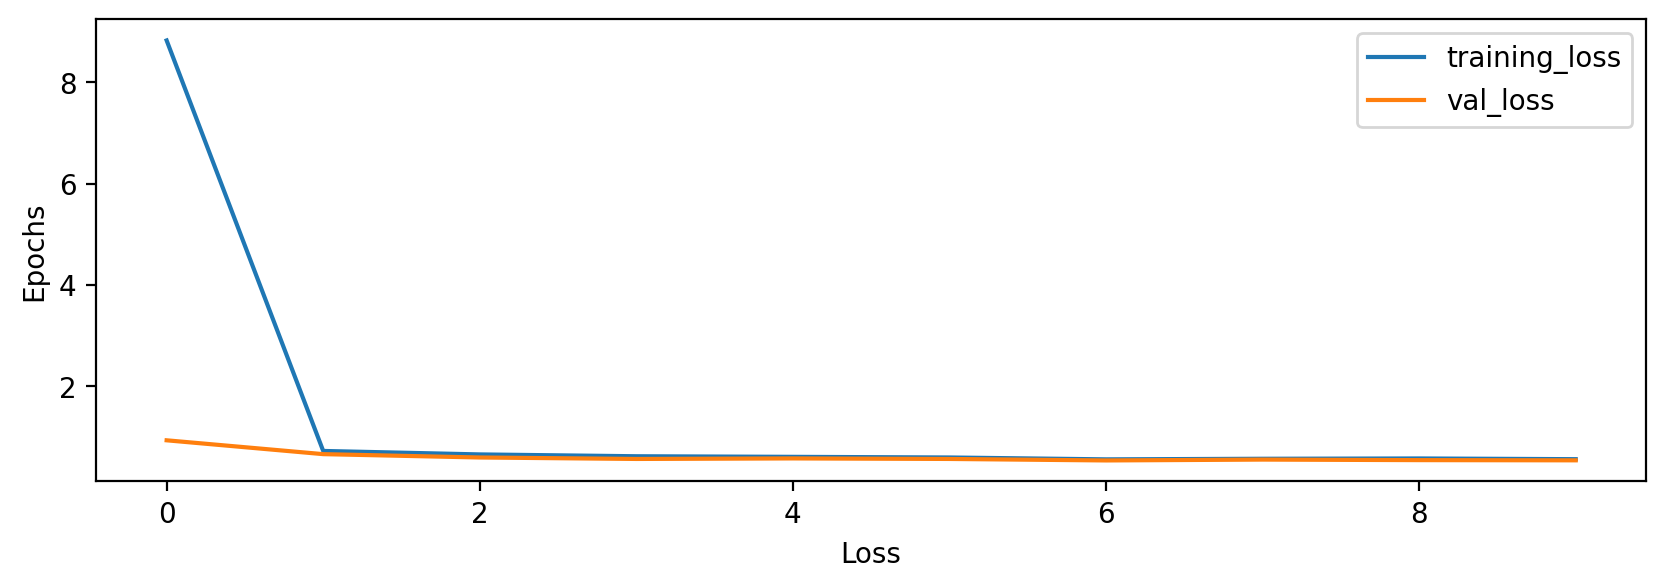

<Figure size 640x480 with 0 Axes>

In [22]:
## checking for overfitting  
history_df = pd.DataFrame(history.history) 
plt.figure(dpi=200, figsize = (10,3)) 
plt.plot(history_df['loss'], 
        label='training_loss') 
plt.plot(history_df['val_loss'], 
        label='val_loss') 
plt.xlabel('Loss') 
plt.ylabel('Epochs') 
plt.legend() 
plt.show() 
plt.savefig('Epoch10.jpg')

In [23]:
history1=model.fit_generator(train_generator,epochs = 15,validation_data = validation_generator)

C:\Users\HP\AppData\Local\Temp\ipykernel_10088\2120565934.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model.fit_generator(train_generator,epochs = 15,validation_data = validation_generator)


Epoch 1/15
23/23 [==============================] - 87s 4s/step - loss: 0.5451 - accuracy: 0.7243 - val_loss: 0.5053 - val_accuracy: 0.7560
Epoch 2/15
23/23 [==============================] - 90s 4s/step - loss: 0.5244 - accuracy: 0.7322 - val_loss: 0.5329 - val_accuracy: 0.7560
Epoch 3/15
23/23 [==============================] - 65s 3s/step - loss: 0.5170 - accuracy: 0.7557 - val_loss: 0.4977 - val_accuracy: 0.7681
Epoch 4/15
23/23 [==============================] - 72s 3s/step - loss: 0.5226 - accuracy: 0.7443 - val_loss: 0.5082 - val_accuracy: 0.7440
Epoch 5/15
23/23 [==============================] - 67s 3s/step - loss: 0.5116 - accuracy: 0.7557 - val_loss: 0.5162 - val_accuracy: 0.7641
Epoch 6/15
23/23 [==============================] - 80s 3s/step - loss: 0.5063 - accuracy: 0.7530 - val_loss: 0.5172 - val_accuracy: 0.7520
Epoch 7/15
23/23 [==============================] - 80s 4s/step - loss: 0.5098 - accuracy: 0.7452 - val_loss: 0.4690 - val_accuracy: 0.7722
Epoch 8/15
23/23 [==

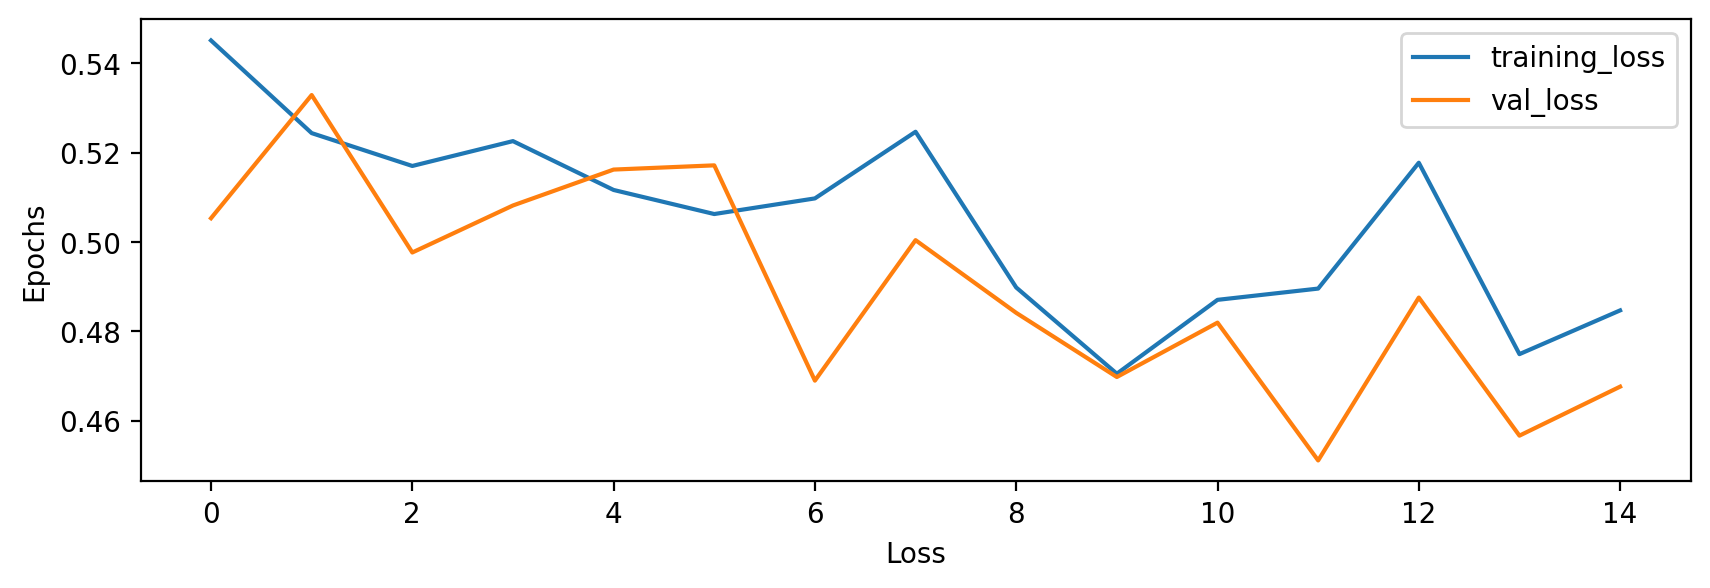

In [25]:
## checking for overfitting  
history_df = pd.DataFrame(history1.history) 
plt.figure(dpi=200, figsize = (10,3)) 
plt.plot(history_df['loss'], 
        label='training_loss') 
plt.plot(history_df['val_loss'], 
        label='val_loss') 
plt.xlabel('Loss') 
plt.ylabel('Epochs') 
plt.legend() 
plt.show() 

In [26]:
history2=model.fit_generator(train_generator,epochs = 20,validation_data = validation_generator)

C:\Users\HP\AppData\Local\Temp\ipykernel_10088\2008819563.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model.fit_generator(train_generator,epochs = 20,validation_data = validation_generator)


Epoch 1/20
23/23 [==============================] - 75s 3s/step - loss: 0.4731 - accuracy: 0.7504 - val_loss: 0.4757 - val_accuracy: 0.7802
Epoch 2/20
23/23 [==============================] - 72s 3s/step - loss: 0.4780 - accuracy: 0.7635 - val_loss: 0.4789 - val_accuracy: 0.7964
Epoch 3/20
23/23 [==============================] - 73s 3s/step - loss: 0.4930 - accuracy: 0.7452 - val_loss: 0.4724 - val_accuracy: 0.7903
Epoch 4/20
23/23 [==============================] - 74s 3s/step - loss: 0.4722 - accuracy: 0.7774 - val_loss: 0.4443 - val_accuracy: 0.7923
Epoch 5/20
23/23 [==============================] - 76s 3s/step - loss: 0.4670 - accuracy: 0.7687 - val_loss: 0.4500 - val_accuracy: 0.7903
Epoch 6/20
23/23 [==============================] - 68s 3s/step - loss: 0.4663 - accuracy: 0.7722 - val_loss: 0.4352 - val_accuracy: 0.8206
Epoch 7/20
23/23 [==============================] - 70s 3s/step - loss: 0.4564 - accuracy: 0.7670 - val_loss: 0.4543 - val_accuracy: 0.8004
Epoch 8/20
23/23 [==

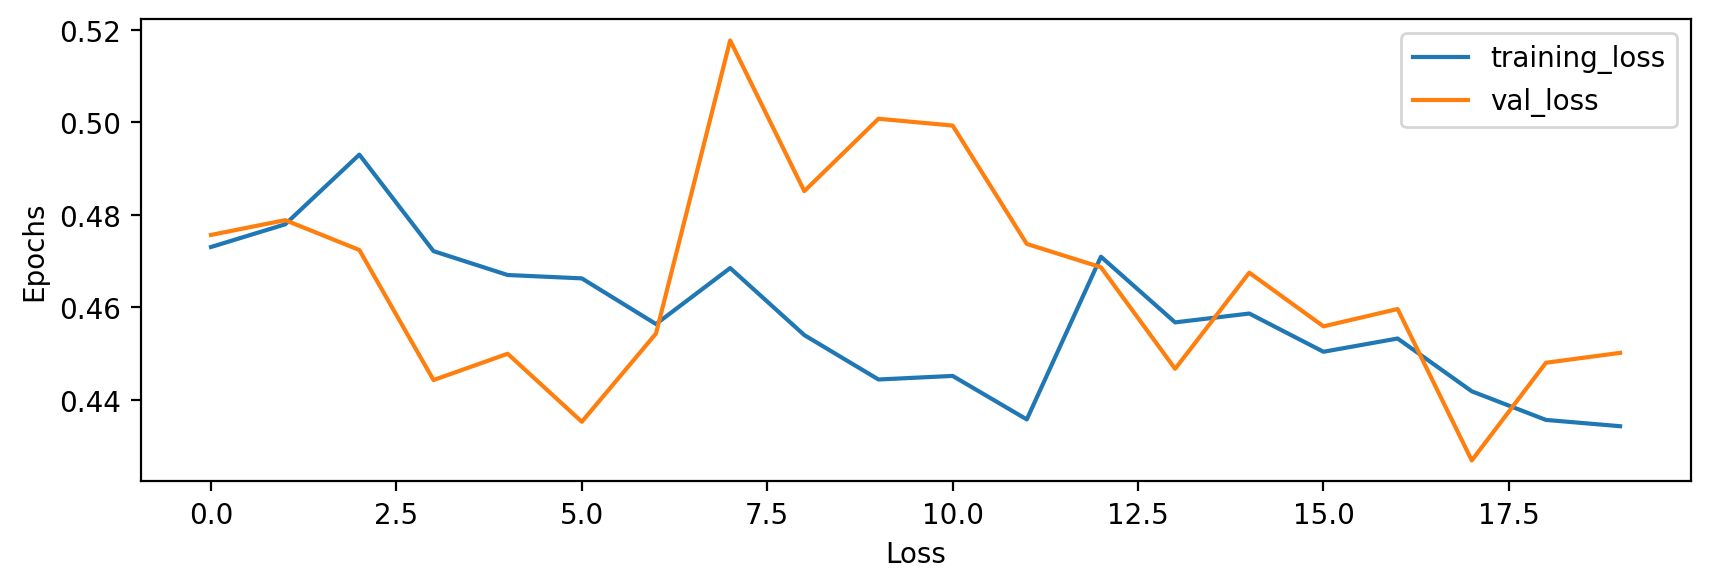

In [27]:
## checking for overfitting  
history_df = pd.DataFrame(history2.history) 
plt.figure(dpi=200, figsize = (10,3)) 
plt.plot(history_df['loss'], 
        label='training_loss') 
plt.plot(history_df['val_loss'], 
        label='val_loss') 
plt.xlabel('Loss') 
plt.ylabel('Epochs') 
plt.legend() 
plt.show() 

Evaluation Stage

In [34]:
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for training 
                                              directory=test_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              #y_col='emergency_or_not', # specifies the class labels 
                                              class_mode=None, # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                             batch_size=1 # defines the batch size  
                                              
                                              )  

Found 706 validated image filenames.


In [36]:
results = model.evaluate(validation_generator)

10/10 [==============================] - 11s 1s/step - loss: 0.5099 - accuracy: 0.7621
